In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose

In [187]:
#исходный датасет
dataset = pd.read_csv("passengers.csv")
dataset

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [189]:
dataset.set_index('Month', inplace = True)
dataset.index = pd.to_datetime(dataset.index)

[Text(0.5, 1.0, 'Перевозки пассажиров с 1949 по 1960 год'),
 Text(0.5, 0, 'Месяцы'),
 Text(0, 0.5, 'Количество пассажиров')]

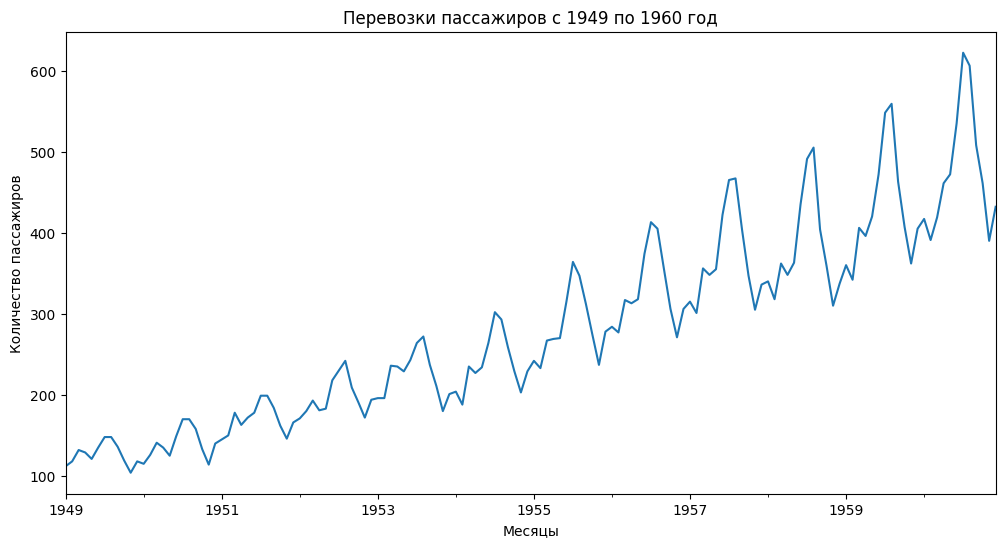

In [190]:
ax = dataset.plot(figsize = (12,6), legend = None)
ax.set(title = 'Перевозки пассажиров с 1949 по 1960 год', xlabel = 'Месяцы', ylabel = 'Количество пассажиров')

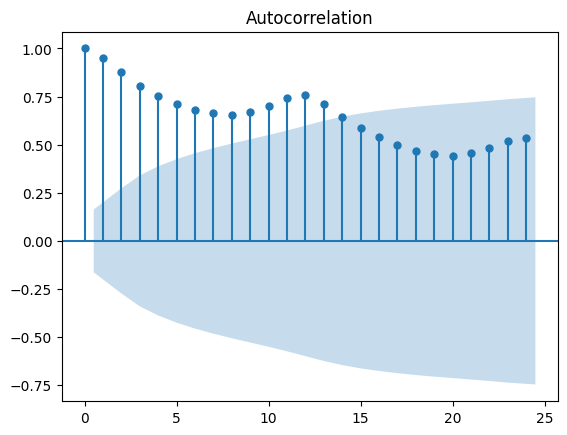

In [191]:
plot_acf(dataset, lags = 24)
plt.axis('tight')
plt.show()

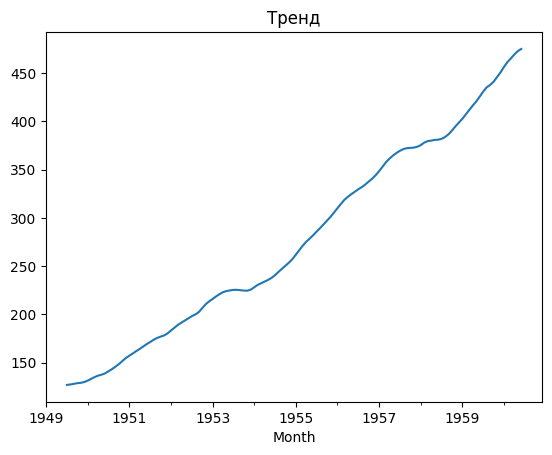

In [192]:
decomposition_add = seasonal_decompose(dataset,  model='additive')
observed_add = decomposition_add.observed
trend_add = decomposition_add.trend
seasonal_add = decomposition_add.seasonal
diff = observed_add.values - seasonal_add.values 

decomposition_multi = seasonal_decompose(dataset,  model='multiplicative')
observed_multi = decomposition_multi.observed
trend_multi = decomposition_multi.trend
seasonal_multi = decomposition_multi.seasonal
quo = observed_multi.values / seasonal_multi.values 

#вывод графика тренда, по которому видно, тренд является линейным 
trend_add.plot()
plt.title('Тренд')
plt.show()

In [193]:
#вычисление параметров тренда с помощью МНК

dataset['time_index'] = range(1, len(dataset)+1)

def analytical_alignment(dataset, t, model):
    X = np.vstack([np.ones(len(dataset)), dataset['time_index'].values]).T
    if model == 'additive':
        Y = diff
    if model == 'multiplicative':
        Y = quo
    beta = np.linalg.lstsq(X, Y, rcond=None)[0]
    a = beta[0]
    b = beta[1]
    return a + b * t

In [194]:
dataset.reset_index(inplace=True)

trend_array_add = [analytical_alignment(dataset, i, 'additive') for i in range(1, len(dataset)+1)]
trend_array_multi = [analytical_alignment(dataset, i, 'multiplicative') for i in range(1, len(dataset)+1)]

levels_add = trend_array_add + seasonal_add.values
levels_multi = trend_array_multi * seasonal_multi.values 

dataset.reset_index(inplace=True)
dataset_add = pd.DataFrame({
    'Month' : dataset['Month'],
    'Passengers' : levels_add
})
dataset_multi = pd.DataFrame({
    'Month' : dataset['Month'],
    'Passengers' : levels_multi
})

dataset.set_index('Month', inplace = True)
dataset.index = pd.to_datetime(dataset.index)
dataset_add.set_index('Month', inplace = True)
dataset_add.index = pd.to_datetime(dataset.index)
dataset_multi.set_index('Month', inplace = True)
dataset_multi.index = pd.to_datetime(dataset.index)


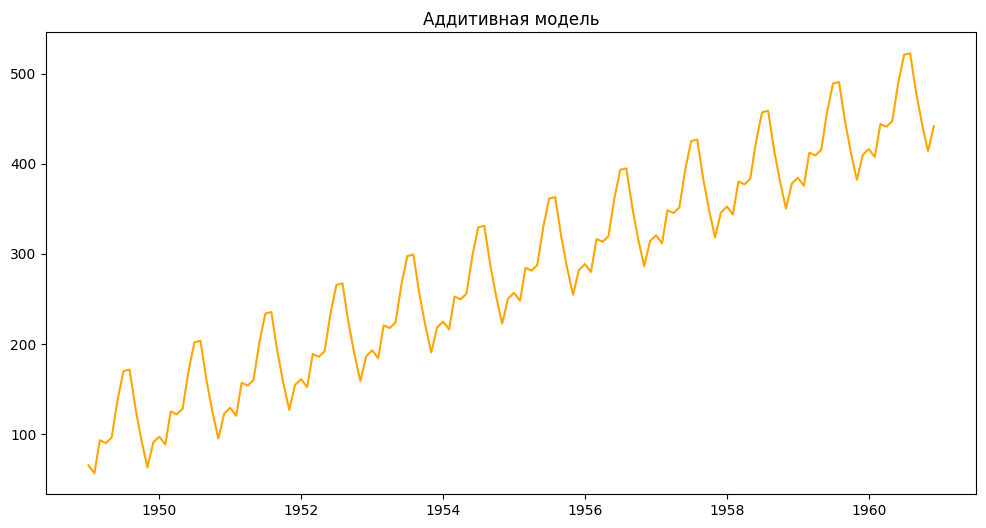

In [195]:
plt.figure(figsize=(12, 6))
plt.plot(dataset_add, color = 'orange')
plt.title('Аддитивная модель')
plt.show()

Text(0.5, 1.0, 'Мультипликативная модель')

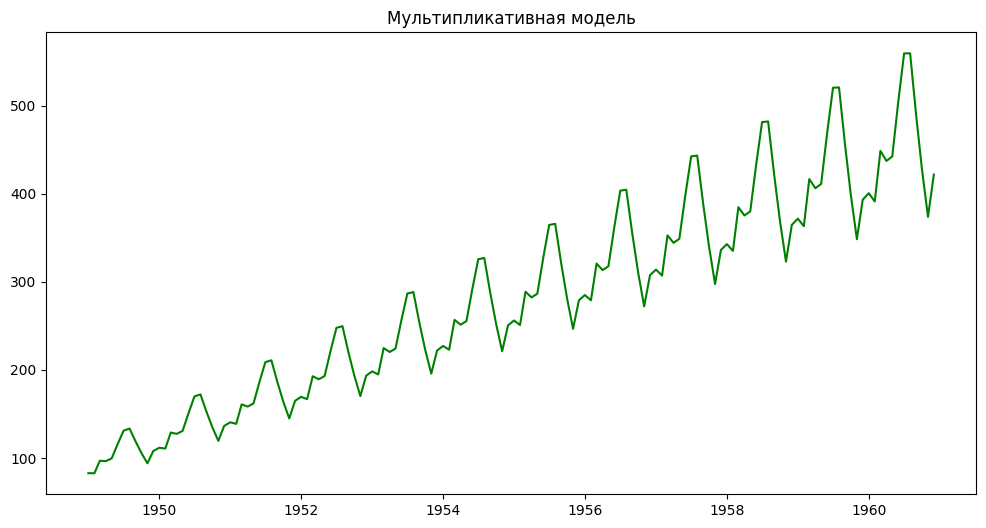

In [198]:
plt.figure(figsize=(12, 6))
plt.plot(dataset_multi, color = 'green')
plt.title('Мультипликативная модель')

In [202]:
train = dataset[:'1958-12']
test = dataset['1959-01':]
predictions_add = dataset_add['1959-01':]
predictions_multi = dataset_multi['1959-01':]

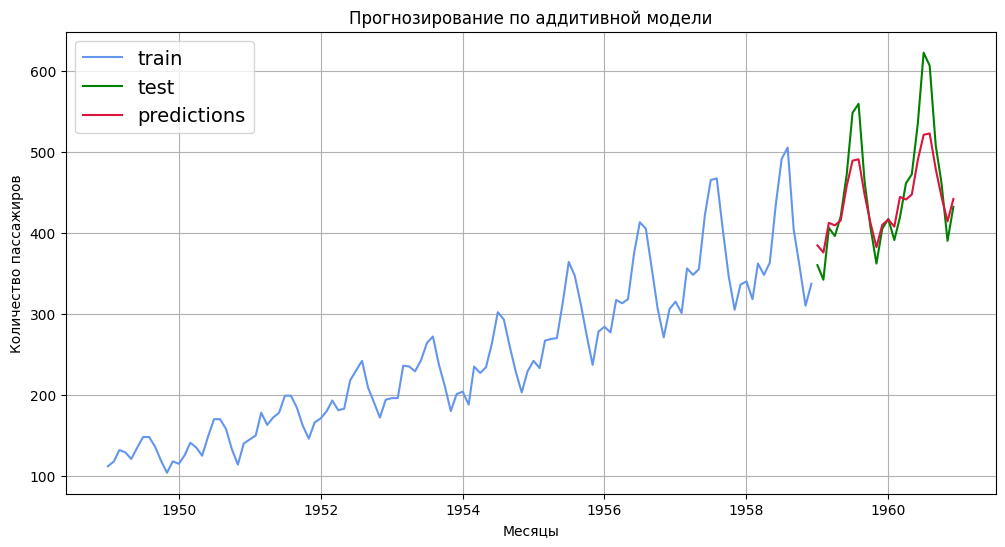

In [207]:
plt.figure(figsize=(12, 6))
plt.plot(train['Passengers'], label = 'train', color = "cornflowerblue")
plt.plot(test['Passengers'], label = 'test', color = "green")
plt.plot(predictions_add['Passengers'], label = 'predictions', color = "crimson")

plt.legend(title = '', loc = 'upper left', fontsize = 14)

plt.title("Прогнозирование по аддитивной модели")
plt.ylabel('Количество пассажиров')
plt.xlabel('Месяцы')

plt.grid()
 
plt.show()

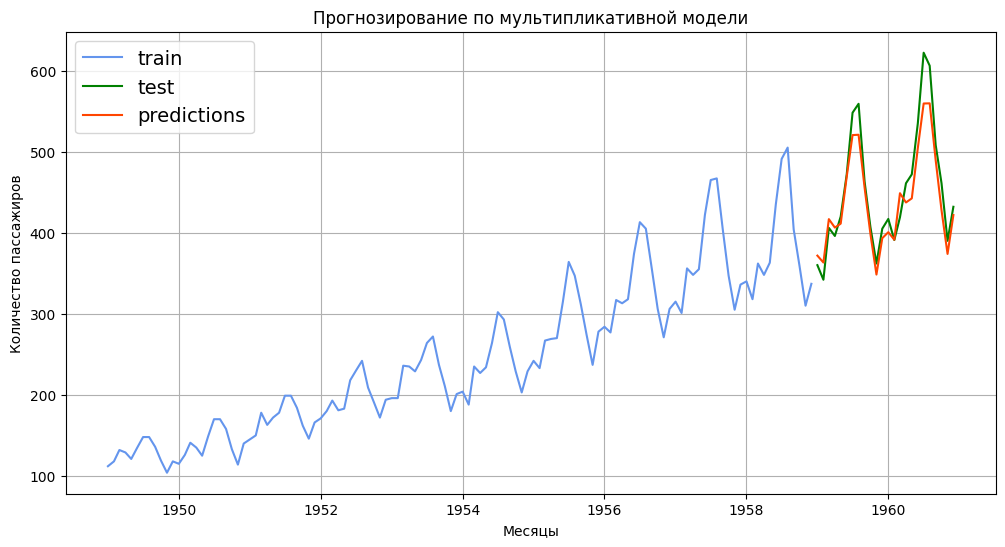

In [208]:
plt.figure(figsize=(12, 6))
plt.plot(train['Passengers'], label = 'train', color = "cornflowerblue")
plt.plot(test['Passengers'], label = 'test', color = "green")
plt.plot(predictions_multi['Passengers'], label = 'predictions', color = "orangered")

plt.legend(title = '', loc = 'upper left', fontsize = 14)

plt.title("Прогнозирование по мультипликативной модели")
plt.ylabel('Количество пассажиров')
plt.xlabel('Месяцы')

plt.grid()
 
plt.show()